<a href="https://colab.research.google.com/github/FabioVCoelho/Univali/blob/master/PythonIntro/Trabalho_M2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


O objetivo do trabalho da M2.1 é trabalhar com esteganografia em imagens. Dada uma imagem, devem ser implementados os algoritmos para esconder uma mensagem e para ler uma mensagem escondida.

Essa mensagem deve ser escondida no último bit da cor azul (não precisa trabalhar com binários, somente com valores pares e ímpares) e deve ser retirada uma mensagem de lá.

Precisam ser criadas duas funções: uma que crie uma lista de inteiros (com valores de 0 ou 1) composta pelos últimos dígitos da cor azul da imagem; a outra função dever receber uma lista de inteiros como parâmetro e alterar o último bit da cor azul da imagem para cada elemento. Lembre-se que a lista não vai ser grande o suficiente para toda a imagem, então altere a imagem só até a mensagem terminar.

Não precisam se preocupar com a conversão da mensagem de texto para a lista de bits e nem o contrário, abaixo já existem essas duas funções prontas: `gerar_mensagem()` recebe uma string por parâmetro e gera uma lista de inteiros e `converter_mensagem()` recebe uma lista de inteiros e gera uma mensagem.

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [68]:
def bitfield(n):
    return [int(digit) for digit in bin(n)[2:]]

def gerar_mensagem(mensagem):
    lista = []
    for m in mensagem:
        val = ord(m)
        bits = bitfield(val)

        if len(bits) < 8:
            for a in range(8-len(bits)):
                bits.insert(0,0)
        lista.append(bits)
    arr = np.array(lista)
    arr = arr.flatten()
    return arr


def converter_mensagem(saida):
    bits = np.array(saida)
    mensagem_out = ''
    bits = bits.reshape((int(len(saida)/8), 8))
    for b in bits:
        sum = 0
        for i in range(8):
            sum += b[i]*(2**(7-i))
        mensagem_out += chr(sum)
    return mensagem_out

In [5]:
def lista_ultimo_bit_do_azul(imagem):
  list_bits = []
  for index_img,img_array in enumerate(imagem):
    for index_pixel,pixel in enumerate(img_array):
      list_bits.append(int(bin(pixel[2])[-1]))
  return list_bits

In [46]:
img = cv2.imread('/content/drive/My Drive/Colab Notebooks/IntroPython/out.png')
converter_mensagem(lista_ultimo_bit_do_azul(img))

'O que temos aqui é uma falha na comunicação\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00

In [45]:
def adicionar_bit_ao_azul(imagem, list_bits):
  temp = 0
  length_list_bits = len(list_bits)
  for index_img,img_array in enumerate(imagem):
    for index_pixel,pixel in enumerate(img_array):
      if temp >= length_list_bits:
        return imagem 
      pixel[2] = int((bin(pixel[2])[:-1] + str(list_bits[temp]))[2:],2)
      temp = temp + 1
  return imagem;

Acabei criando uma função para gerar a mensagem, ambas fazem a mesma coisa, só que a minha gera uma lista e a do professor gera um numpy.array

In [8]:
def convert_string_to_list_bit(phrase):
  return list(map(int,''.join(format(ord(i), '08b') for i in phrase)))

In [63]:
list_of_bits = convert_string_to_list_bit("Como diria o Goblin Arsonist: With great power comes great risk of getting yourself killed.")
img_lena = cv2.imread('/content/drive/My Drive/Colab Notebooks/IntroPython/lena.png')
img_modified = adicionar_bit_ao_azul(img_lena, list_of_bits)

converter_mensagem(lista_ultimo_bit_do_azul(img_modified))

'Como diria o Goblin Arsonist: With great power comes great risk of getting yourself killed.=\x99Þ¿\x08_\x9a\x06ÿ#+\x12 \x87AÂðÔ\x95ct\x9cg>\x19íó¤\x93^\x8fÄ<ÞÁ\x8f\x91Þx\x1f\r\x1f\x1c$Ï²iJt¥2k\x91»\x9d`ÓÅö,=Ôí$á\x0b¸\x9f\x00ÛDÉö:\x8e\x91Õîÿ\x8f×í^tÆ7EÎÔ@Ì~»?\x0f]\\\x08jÞû¯\x93ÅkjÃâ]zÜ\x1búCe²E´lÉÚ²ÝB\x98Ùh1\x1fÒÃõ\x9c/ªI8Ð\x94ÐQs±b\nÜ³¶ÑRÅÁ\x93\x99\x1b\x1aÑ\x1c±\x11\xa0©P:I!=stÂKÿ\x8d¬£ò^ybN\x873\x07i\x97*¿ûq\x99+ÿÂ\x94(\x86çPÛ&Ú5L¢ÙB\x0c÷V+Ï0mvüÅü\x00]åß\x90}\x10!íôâT\x00ÁbÈ"K÷\x14ÝÒ\x02ÉÊ\x1a¾\x11Ã:ä\x8f\t\x92©¿\x13\x8bC=µ\x90êÄñ¨S\x1b\x0cg(N¿ÿ\x97<à\x9f\x05cË\x14\x1aszöç\x92\x95#<ûòç/{IM\x9daç\x1e\x89ÅP{W\x9a\x89º\x08R/T\x01À<Ð»ÑTX-á\x166\xa0\x00T\x9fcÛm³\x05\x93#\x12½³\x0c\x1f4G\x14ÍÂ\x00\x81ü\r3\x89¤u\x8ew}\x81YäH*Út\x7f©:\x07éÞ\x8aÏ\x0e=Æ\x99\x88kF\x90Ö2!\x967\x83\x86øa\x00\x99\x16\x8bÉv5ð¬éÿ\x80êÈ\x8b\x17üÝ÷üý$\x8b\x04\x85ê\x8a\x052i\x81\x86\x13¦*¾¨ÍåP°Òg\xa0\x00f5\x82¦ºL¯µd\x03\x99\x9eú\x0f\x13\x17\x1e£\x9aÃ\x9f÷&£]§ü52e\x11z/¥Ö\x99E_&\x9d"T\x95\x9b\x82\x976\x18Þ\x124T)\x1f³\x

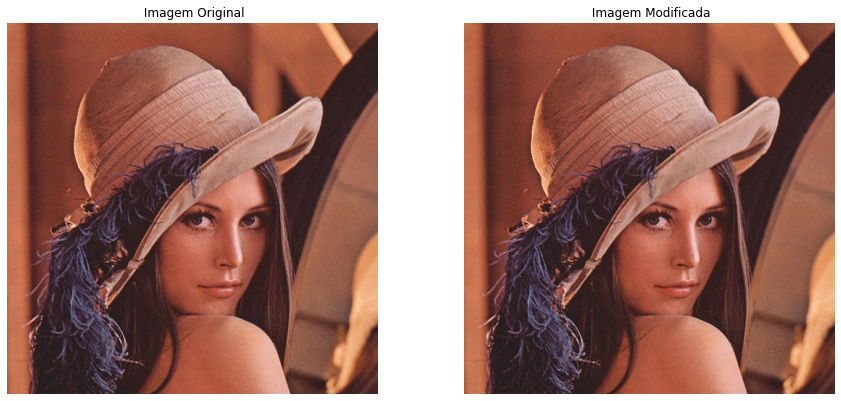

In [69]:
img = cv2.cvtColor(img_modified, cv2.COLOR_BGR2RGB)
im2 = cv2.cvtColor(img_lena, cv2.COLOR_BGR2RGB)

fig = plt.figure(figsize=(15,15))

fig.add_subplot(221)
plt.title(' Imagem Original')
plt.axis('off')
plt.imshow(im2)

fig.add_subplot(222)
plt.title(' Imagem Modificada')
plt.axis('off')
plt.imshow(img)